In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import steepest_descent, newton, BFGS, DFP
from objectives import get_rosenbrock, get_lgt_obj, get_zakharov

Common plotting method for all 3 functions

In [2]:
def plot_results(dim, results, title, filename):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    for label, (function_history, gradient_norms) in results.items():
        plt.plot(function_history[:100], label=f'{label} - Function Value') 
    plt.title(f'{title} - Function Value')
    plt.xlabel('Iterations')
    plt.ylabel('Function Value')
    plt.legend()

    plt.subplot(1, 2, 2)
    for label, (function_history, gradient_norms) in results.items():
        plt.plot(gradient_norms[:100], label=f'{label} - Gradient Norm')  
    plt.title(f'{title} - Gradient Norm')
    plt.xlabel('Iterations')
    plt.ylabel('Gradient Norm')
    plt.legend()

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

Common method to save comparision in number of iterations for each optimization algo

In [3]:
import pandas as pd

def save_results_to_csv(results, filename):

    data = {
        'Algorithm': [],
        'Dimension_or_Lambda': [],
        # 'Time': [],
        'Final Function Value': [],
        'Final Gradient Norm': [],
        'Iterations': []
    }

    # Populate the dictionary with the results
    for dim, methods_results in results.items():
        for label, (function_history, gradient_norms) in methods_results.items():
            data['Algorithm'].append(label)
            data['Dimension_or_Lambda'].append(dim)
            # data['Time'].append(cumulative_times[-1])
            data['Final Function Value'].append(function_history[-1])
            data['Final Gradient Norm'].append(gradient_norms[-1])
            data['Iterations'].append(len(function_history))
        
    df_results = pd.DataFrame(data)
    df_results.to_csv(filename, index=False)


For Rosebrock

In [ ]:
dimensions = [2, 5, 10, 50]
results = {}

for dim in dimensions:
    f, gradf, hessf, x0 = get_rosenbrock(dim)
    results[dim] = {}

    methods = {
        'Steepest Descent': steepest_descent,
        'Newton': newton,
        'BFGS': BFGS,
        'DFP': DFP
    }

    for label, method in methods.items():
        if label == 'Newton':
            xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, hessf)
        else:
            xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf)
        results[dim][label] = (function_history, gradient_norms)
        print(f"{label} done for dim={dim}")

    plot_results(dim, results[dim], f'Rosenbrock Function Optimization for Dimension {dim}', f'rosenbrock_{dim}.png')
save_results_to_csv(results, 'rosenbrock_results.csv')

For Zakharov

In [ ]:
results = {}
# Iterate over each dimension

f, gradf, hessf, x0 = get_zakharov(2)
results[0] = {}

methods = {
    'Steepest Descent': steepest_descent,
    'Newton': newton,
    'BFGS': BFGS,
    'DFP': DFP
}

for label, method in methods.items():
    if label == 'Newton':
        xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, hessf)
    else:
        xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf)
    results[0][label] = (function_history, gradient_norms)
    print(f"{label} done for dim={2}")

plot_results(2, results[0], f'Zakharov Function Optimization for Dimension {2}', f'zakharov_2.png')
save_results_to_csv(results, 'zakharov_results.csv')


For Logistic Regression on MNIST

In [ ]:
# import time
# lambdas = [0.001, 0.01, 0.1]
# results = {}

# for lam in lambdas:
#     f, gradf, hessf, x0 = get_lgt_obj(lam)
#     results[lam] = {}

#     methods = {
#         'Steepest Descent': steepest_descent,
#         'Newton': newton,
#         'BFGS': BFGS,
#         'DFP': DFP
#     }

#     for label, method in methods.items():
#         start_time = time.time()
#         if label == 'Newton':
#             xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, hessf, lam, t0=1e-3, grad_tol=1e-5)
#         elif label == 'DFP':
#             # continue
#             xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, lam, c1=0.8, t0=1e-3, grad_tol=1e-3)
#         else:
#             xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, lam, t0=1e-3, grad_tol=1e-5)
#         results[lam][label] = (function_history, gradient_norms)
#         end_time = time.time()
#         print(f"{label} done for λ={lam} in {end_time - start_time} seconds")

#     plot_results(lam, results[lam], f'LGT Function Optimization with λ={lam}', f'lgt_{lam}.png')
    
# save_results_to_csv(results, 'lgt_results.csv')

In [ ]:
import time
lambdas = [0.001, 0.01, 0.1]
results = {}

for lam in lambdas:
    f, gradf, hessf, x0 = get_lgt_obj(lam)
    results[lam] = {}

    methods = {
        'Steepest Descent': lambda x0, f, gradf: steepest_descent(x0, f, gradf, c0=0.0001, c1=0.9, t0=0.1e-3, grad_tol=1e-5),
        'Newton': lambda x0, f, gradf, hessf: newton(x0, f, gradf, hessf, c0=0.0001, c1=0.9, t0=1e-3, grad_tol=1e-5),
        'BFGS': lambda x0, f, gradf: BFGS(x0, f, gradf, c0=0.001, c1=0.9, t0=1e-3, grad_tol=1e-3),
        'DFP': lambda x0, f, gradf: DFP(x0, f, gradf, c0=0.001, c1=0.5, t0=1e-3, grad_tol=1e-3)
    }

    for label, method in methods.items():
        print(f"Running {label} for λ={lam}")
        start_time = time.time()
        if label == 'Newton':
            xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, hessf)
        else:
            xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf)
        results[lam][label] = (function_history, gradient_norms)
        end_time = time.time()
        print(f"{label} done for λ={lam} in {end_time - start_time} seconds")

    plot_results(lam, results[lam], f'LGT Function Optimization with λ={lam}', f'lgt_{lam}.png')
    
save_results_to_csv(results, 'lgt_results.csv')


2025-02-16 13:55:39,449 - INFO - Newton done for c0=0.0001 in 192.67431211471558 seconds
2025-02-16 13:55:39,449 - INFO - Iterations: 452, Final Function Value: 0.031267870877221424, Final Gradient Norm: 9.92884141473005e-06
2025-02-16 13:59:32,071 - INFO - Newton done for c0=0.001 in 232.62001419067383 seconds
2025-02-16 13:59:32,074 - INFO - Iterations: 452, Final Function Value: 0.031267870877221424, Final Gradient Norm: 9.92884141473005e-06
2025-02-16 14:03:48,064 - INFO - Newton done for c0=0.01 in 255.98979783058167 seconds
2025-02-16 14:03:48,066 - INFO - Iterations: 478, Final Function Value: 0.03126787086533303, Final Gradient Norm: 9.92773020746447e-06


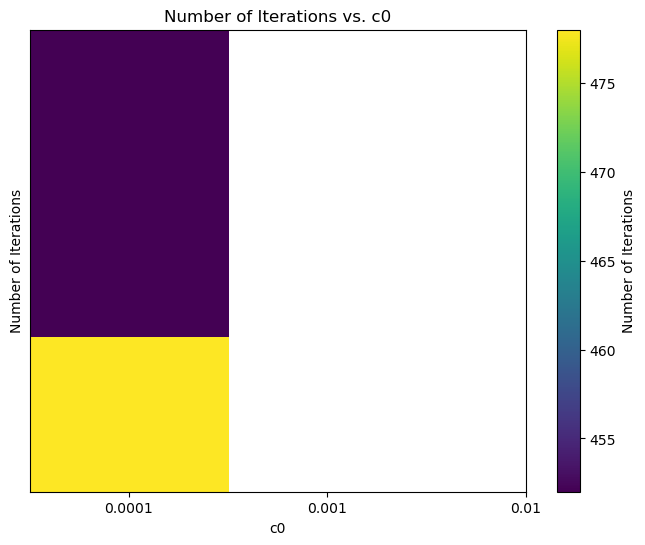

In [12]:
import logging
import time

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define search grid
c0_values = [1e-4, 1e-3, 1e-2]  # Typical range

# Fixed parameters
c1_fixed = 0.9  # Fixed c1 value
lambda_fixed = 0.001  # Regularization parameter
t0_fixed = 1e-3  # Small step size
grad_tol_fixed = 1e-5  # Small enough tolerance

# Load LGT problem
f, gradf, hessf, x0 = get_lgt_obj(lambda_fixed)

# Storage for results
results = {}

for c0 in c0_values:
    results[c0] = {}

    # Test Newton method
    method = lambda x, f, gradf, hessf: newton(x, f, gradf, hessf, c0=c0, c1=c1_fixed, t0=t0_fixed, grad_tol=grad_tol_fixed)

    start_time = time.time()
    xsol, function_history, cumulative_times, gradient_norms = method(x0, f, gradf, hessf)
    end_time = time.time()

    results[c0]["Newton"] = {
        "iterations": len(function_history),
        "final_f": function_history[-1],
        "final_grad_norm": gradient_norms[-1]
    }

    logging.info(f"Newton done for c0={c0} in {end_time - start_time} seconds")
    logging.info(f"Iterations: {len(function_history)}, Final Function Value: {function_history[-1]}, Final Gradient Norm: {gradient_norms[-1]}")

# Convert to a heatmap-friendly format
data = []
for c0, methods in results.items():
    for method, values in methods.items():
        data.append([method, c0, values["iterations"], values["final_f"], values["final_grad_norm"]])

df = pd.DataFrame(data, columns=["Method", "c0", "Iterations", "Final Function Value", "Final Gradient Norm"])

# Pivot table for heatmap
pivot_iterations = df.pivot_table(index="c0", values="Iterations", aggfunc="mean")

# Plot heatmap using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(pivot_iterations.values.reshape(-1, 1), cmap="viridis", aspect='auto')
plt.colorbar(label='Number of Iterations')
plt.title("Number of Iterations vs. c0")
plt.xlabel("c0")
plt.ylabel("Number of Iterations")
plt.xticks(ticks=range(len(c0_values)), labels=c0_values)
plt.yticks([])
plt.show()
